# Adathalmaz leírása

A vizsgált csoport három különböző búzafajta (*Kama*, *Rosa* és *Canadian*) szemcséiből állt, mindegyikből **70 mintát** választottak ki véletlenszerűen a kísérlethez.

A szemek belső szerkezetének magas minőségű megjelenítését egy **lágy röntgensugaras technikával** végezték. Ez a módszer:

- Roncsolásmentes
- Jelentősen olcsóbb, mint más fejlettebb képalkotó technikák, például a pásztázó mikroszkópia vagy lézeres technológia

A felvételeket **13x18 cm-es KODAK röntgenlemezeken** rögzítették.

A vizsgálatokat kombájnnal betakarított búzaszemekkel végezték, amelyek a **Lengyel Tudományos Akadémia Agrofizikai Intézetének** (Lublin) kísérleti földjeiről származtak.

> Az adathalmaz **klasszifikációs** (osztályozási) és **klaszterezési** (csoportosítási) feladatokra is alkalmas.

---

# Attribútumok

A búzaszemekről hét geometriai jellemzőt mértek:

1. **Terület** (`area`, *A*)
2. **Kerület** (`perimeter`, *P*)
3. **Kompaktság (Búzaszem alakja)**  
   `compactness = (4 * π * A) / P²`
4. **A szem hosszúsága** (`length of kernel`)
5. **A szem szélessége** (`width of kernel`)
6. **Aszimmetria együttható (mennyire szimmetrikus a búzaszem)** (`asymmetry coefficient`)
7. **Barázda hosszúsága** (`length of kernel groove`)

- Minden fenti attribútum **folytonos, valós számértékű**.

8. **Osztályozási címke** (`classification`) – a búzafajta neve:  
   `Kama`, `Rosa` vagy `Canadian`


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('data_16.csv', skiprows=1, names=['terulet', 'kerulet', 'kompaktsag', 'szemhossz', 'szem_szelesseg',
                                      'asszimetria_egyutthato', 'barazdahossz', 'osztalycimke'])

df['buza_fajtaja'] = df['osztalycimke'].replace(1,'Kama') \
                              .replace(2,'Rosa') \
                              .replace(3,'Canadian')
                        
df.head()

,terulet,kerulet,kompaktsag,szemhossz,szem_szelesseg,asszimetria_egyutthato,barazdahossz,osztalycimke,buza_fajtaja
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   terulet                 210 non-null    float64
 1   kerulet                 210 non-null    float64
 2   kompaktsag              210 non-null    float64
 3   szemhossz               210 non-null    float64
 4   szem_szelesseg          210 non-null    float64
 5   asszimetria_egyutthato  210 non-null    float64
 6   barazdahossz            210 non-null    float64
 7   osztalycimke            210 non-null    int64  
 8   buza_fajtaja            210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


In [76]:
df.describe()

,terulet,kerulet,kompaktsag,szemhossz,szem_szelesseg,asszimetria_egyutthato,barazdahossz,osztalycimke
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


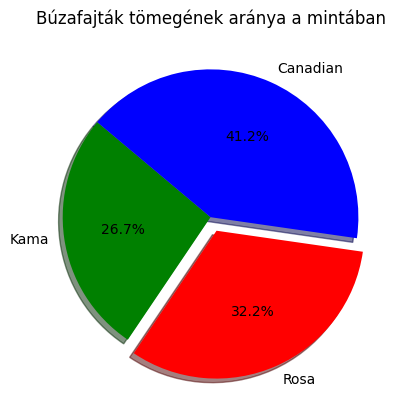

In [77]:
labels = df['buza_fajtaja'].unique().tolist()
sizes = df.groupby('buza_fajtaja')['terulet'].sum().tolist()
colors = ['green', 'red', 'blue']
explode = (0, 0.1, 0)  # A Rosa kicsit kiemelve

# Kördiagram rajzolása
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140) #explode - szelet kiemelése, autopct - százalékok kiírása, 
                                                        #startangle - elforgatja a diagrammot x fokkal.

plt.title("Búzafajták tömegének aránya a mintában")
plt.show()

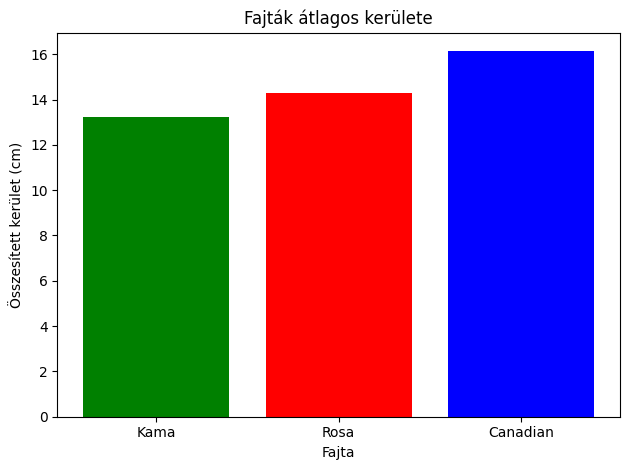

In [89]:
# Színek definiálása fajtánként
labels = df['buza_fajtaja'].unique().tolist()
sizes = df.groupby('buza_fajtaja')['kerulet'].mean().tolist()
colors = ['green', 'red', 'blue']

plt.bar(labels, sizes, color=colors)

# Címek és címkék hozzáadása
plt.title("Fajták átlagos kerülete")
plt.xlabel("Fajta")
plt.ylabel("Összesített kerület (cm)")

# Diagram megjelenítése
plt.tight_layout() # elhelyezi a diagrammokat megfelelően
plt.show()

array([[<Axes: title={'center': 'szemhossz'}>,
        <Axes: title={'center': 'szem_szelesseg'}>]], dtype=object)

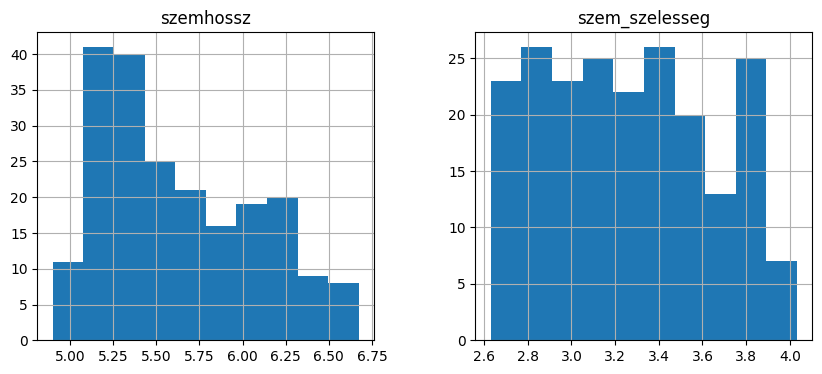

In [79]:
features = ['szemhossz', 'szem_szelesseg']
df[features].hist(figsize=(10,4)) # hisztogramm --> param: 10 széles 4 magas

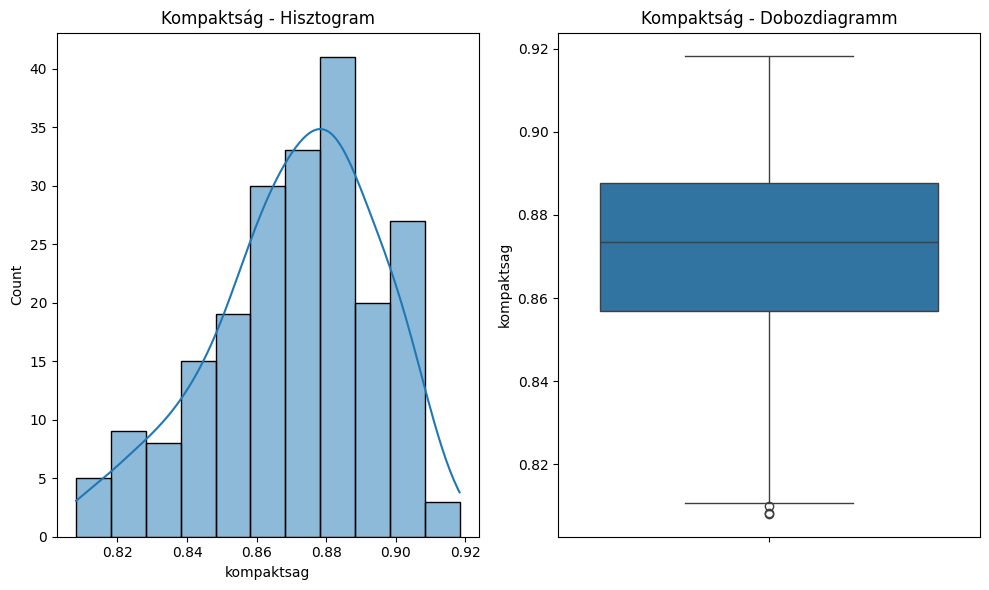

In [91]:
# Ábra létrehozása 1 sorban és 2 oszlopban eltérő méretekkel
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Hisztogram
sns.histplot(df['kompaktsag'], kde=True, ax=axes[0]) #kde - görbét is rajzol
axes[0].set_title('Kompaktság - Hisztogram')

# Boxplot (vízszintes)
sns.boxplot(y=df['kompaktsag'], ax=axes[1]) # y tengely megadásával hosszára rajzolja ki
axes[1].set_title('Kompaktság - Dobozdiagramm')

# Ábra megjelenítése
plt.tight_layout() # elhelyezi a diagrammokat megfelelően
plt.show()

<Axes: >

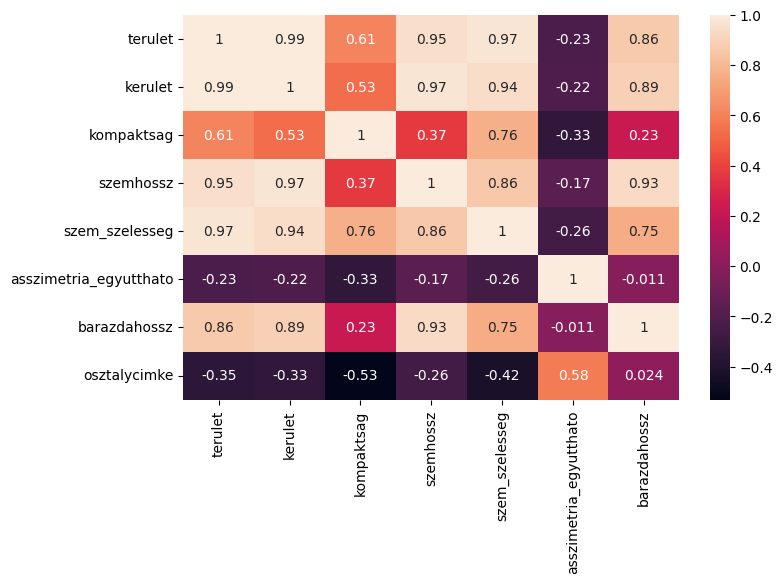

In [96]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = corr_matrix.drop('osztalycimke',axis=1)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,ax=ax) # annot --> értékek is jelölve vannak